In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#  Generate a function of q value vs mortality on the test set, including a graph, from the continuous model

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
try:
    import cPickle as pickle
except ImportError:
    import _pickle as pickle
from pandas import DataFrame
import matplotlib.pyplot as plt
train_orig = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_train_data_final_cont.csv')

In [3]:
test_data = pd.read_csv("C:\\Users\\sara1\\Desktop\\Workingdata\\rl_test_data_final_cont.csv")
q_vals_path = 'C:\\Users\\sara1\\Desktop\\Results\\SARSA_continous_noterm\\phys_q_test.p'
q_vals_test = pickle.load(open( q_vals_path, "rb" ))

In [4]:
test_data.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,vaso_input,reward
0,30223578,0.0,0.75,0.886076,0.136949,1.0,0.0,0.000000,0.514568,0.3125,...,0.548997,0.486842,0.605949,0.974913,0.359217,0.843146,0.0,1,4.0,-0.025
1,30223578,0.0,0.75,0.886076,0.136949,1.0,0.0,0.086957,0.514568,0.3125,...,0.548997,0.486842,0.605949,0.974913,0.359217,0.843146,0.0,1,4.0,0.625
2,30223578,0.0,0.75,0.886076,0.136949,1.0,0.0,0.130435,0.514568,0.0000,...,0.548997,0.486842,0.605949,0.974913,0.359217,0.843146,0.0,1,4.0,-0.025
3,30223578,0.0,0.75,0.886076,0.136949,1.0,0.0,0.217391,0.514568,0.3750,...,0.548997,0.486842,0.605949,0.974913,0.359217,0.843146,0.0,1,4.0,-0.025
4,30223578,0.0,0.75,0.886076,0.136949,1.0,0.0,0.260870,0.514568,0.0625,...,0.548997,0.486842,0.605949,0.974913,0.359217,0.843146,0.0,1,4.0,-0.025


In [5]:
# get the unique ids
unique_ids = test_data['stay_id'].unique()

In [ ]:
# BELOW THREE CELLS ARE DIAGNOSTICS ON TRAIN-TEST SET DISTRIBUTION

In [ ]:
# count = 0
# for i in unique_ids:
#     a= test_data[test_data['stay_id'] == i]
#     u = a[a['bloc'] ==1]['mortality']
#     x =  np.array(u)[0]
#     count += x
# print count/float(len(unique_ids))
# print count

In [ ]:
# train_data = pd.read_csv('rl_train_set_small.csv')
# unique_ids2 = train_data['icustayid'].unique()

In [ ]:
# count = 0
# for i in unique_ids2:
#     a= train_data[train_data['stay_id'] == i]
#     u = a[a['bloc'] ==1]['mortality']
#     x =  np.array(u)[0]
#     count += x
# print count/float(len(unique_ids2))

In [6]:
# define an action mapping - how to get an id representing the action from the (vaso) tuple
action_map = {}
count = 0
for vaso in range(5):
    action_map[(vaso)] = count
    count += 1

In [7]:
phys_score = np.mean(q_vals_test)
print (phys_score)

0.009876251


In [8]:
pp = pd.Series(q_vals_test)
phys_df = pd.DataFrame(pp)

In [9]:
import copy
phys_df['mort'] = copy.deepcopy(np.array(test_data['died_in_hosp']))

In [10]:
from scipy.stats import sem

In [11]:
bin_medians = []
mort = []
mort_std = []
i = -15
while i <= 20:
    count =phys_df.loc[(phys_df[0]>i-0.5) & (phys_df[0]<i+0.5)]
    try:
        res = sum(count['mort'])/float(len(count))
        if len(count) >=2:
            bin_medians.append(i)
            mort.append(res)
            mort_std.append(sem(count['mort']))
    except ZeroDivisionError:
        pass
    i += 1

In [12]:
def sliding_mean(data_array, window=2):
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)     
    return np.array(new_list)

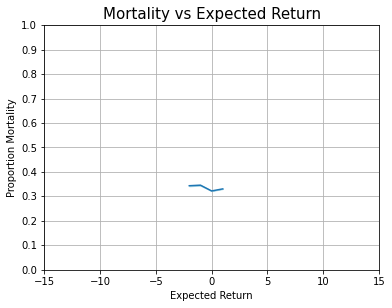

In [13]:
plt.figure(figsize=(6, 4.5))
plt.plot(bin_medians, sliding_mean(mort))
plt.fill_between(bin_medians, sliding_mean(mort) - 1*sliding_mean(mort_std),  
                 sliding_mean(mort) + 1*sliding_mean(mort_std), color='#ADD8E6')
plt.grid()
plt.xticks(range(-15,20,5))
r = [float(i)/10 for i in range(0,11,1)]
_ = plt.yticks(r)
_ = plt.title("Mortality vs Expected Return", fontsize=15)  
_ = plt.ylabel("Proportion Mortality")
_ = plt.xlabel("Expected Return")

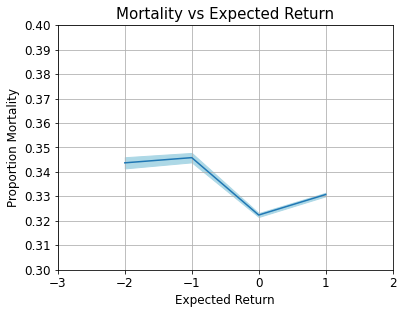

In [14]:
plt.figure(figsize=(6, 4.5))
plt.plot(bin_medians, sliding_mean(mort))
plt.fill_between(bin_medians, sliding_mean(mort) - 1*sliding_mean(mort_std),  
                 sliding_mean(mort) + 1*sliding_mean(mort_std), color='#ADD8E6')
plt.grid()
plt.xticks(np.arange(-3, 3, 1), fontsize=12)
plt.yticks(np.arange(0.3, 0.4, 0.01), fontsize=12)
plt.title("Mortality vs Expected Return", fontsize=15)  
plt.ylabel("Proportion Mortality", fontsize=12)
plt.xlabel("Expected Return", fontsize=12)
plt.show()


In [15]:
len(phys_df[phys_df['mort']==1])/float(len(phys_df))

0.3209146240318485